# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

In [1]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots to identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

In [2]:
sms_df = pd.read_csv("sms.csv")
sms_df.head()

,Fraudolent,SMS test,ID,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [3]:
print("Rows:",sms_df.shape[0]) # In this way we gain knowledge about the real dimensions of the dataset

Rows: 5572


In [4]:
# Count NaN values in the dataset
nan_count = sms_df.isna().sum()

# Display the count of NaN values for each column
print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS test         0
ID               0
Date and Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in the cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column.

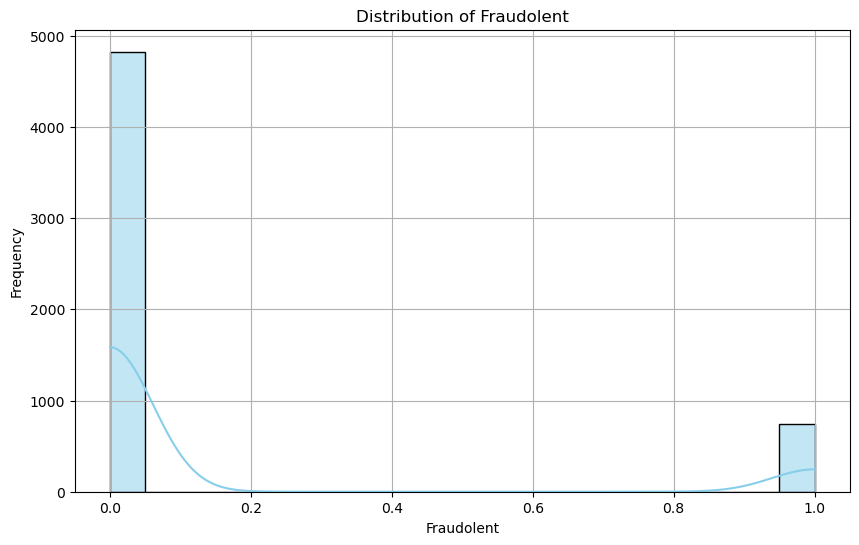

In [5]:

column_to_analyze = 'Fraudolent'

# Create a distribution plot (histogram) to visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

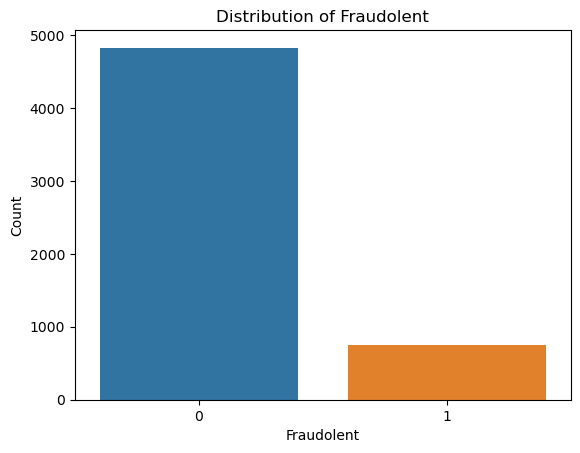

In [6]:
# Visualize the distribution of Fraudolent
sns.countplot(data=sms_df, x='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

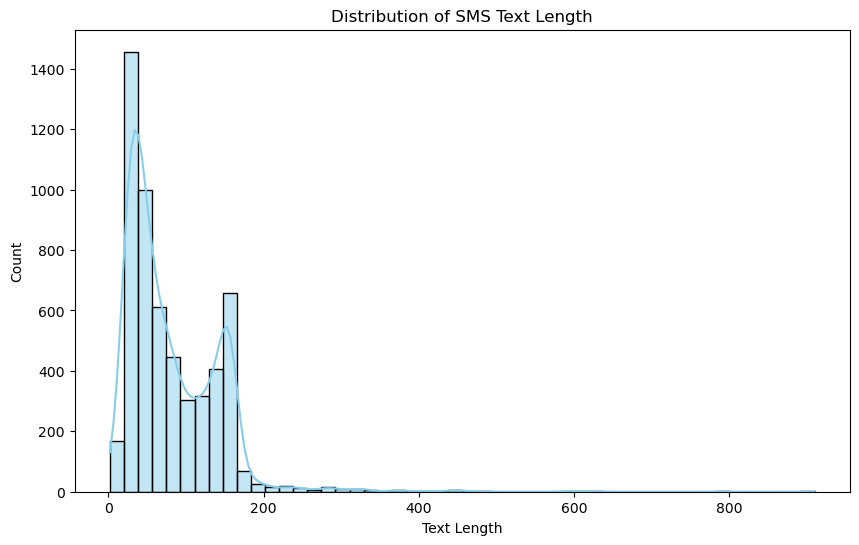

In [7]:
# Assuming the SMS text column is named 'SMS text'
sms_df['text_length'] = sms_df['SMS test'].apply(len)

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


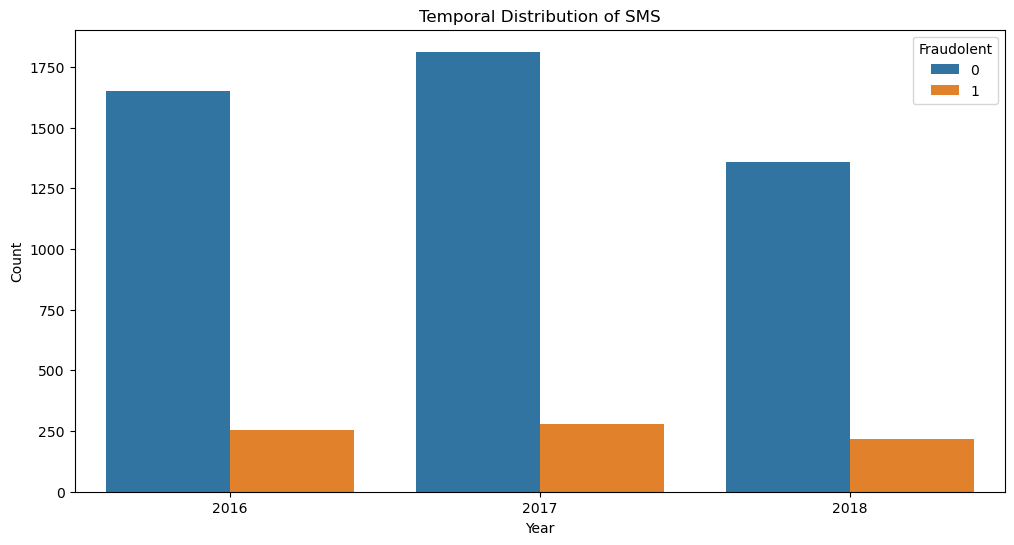

In [8]:

# Assuming the Date and Time column is named 'Date and Time'
sms_df['Date and Time'] = pd.to_datetime(sms_df['Date and Time'])

# Extract date and time components
sms_df['Year'] = sms_df['Date and Time'].dt.year
sms_df['Month'] = sms_df['Date and Time'].dt.month
sms_df['Day'] = sms_df['Date and Time'].dt.day

# Visualize temporal distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


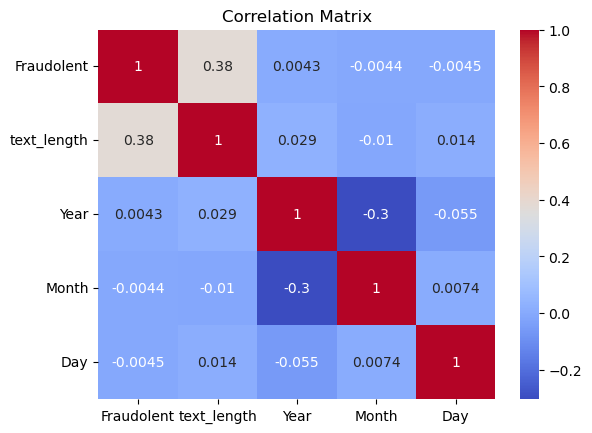

In [9]:
# Assuming there are other numerical columns in the dataset
correlation_matrix = sms_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Check for missing values (another way to do this without having to find Nan values)
missing_values = sms_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove duplicates or irrelevant columns
# Assuming you want to drop the 'text_length' column created for analysis
df = sms_df.drop(['text_length'], axis=1)


Missing Values:
 Fraudolent       0
SMS test         0
ID               0
Date and Time    0
text_length      0
Year             0
Month            0
Day              0
dtype: int64


# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.

* We will also have to encode categorical values using OneHotEncoding.


In [11]:
encoder = OneHotEncoder()   # not necessary

cols= encoder.fit_transform(sms_df[['SMS test']])

print(cols)

  (0, 3732)	1.0
  (1, 260)	1.0
  (2, 2711)	1.0
  (3, 2701)	1.0
  (4, 3619)	1.0
  (5, 3494)	1.0
  (6, 2630)	1.0
  (7, 2771)	1.0
  (8, 683)	1.0
  (9, 2115)	1.0
  (10, 2589)	1.0
  (11, 2871)	1.0
  (12, 2166)	1.0
  (13, 903)	1.0
  (14, 936)	1.0
  (15, 3583)	1.0
  (16, 638)	1.0
  (17, 1432)	1.0
  (18, 958)	1.0
  (19, 3966)	1.0
  (20, 4718)	1.0
  (21, 641)	1.0
  (22, 907)	1.0
  (23, 1838)	1.0
  (24, 4025)	1.0
  :	:
  (5547, 3795)	1.0
  (5548, 386)	1.0
  (5549, 4496)	1.0
  (5550, 933)	1.0
  (5551, 4091)	1.0
  (5552, 241)	1.0
  (5553, 2038)	1.0
  (5554, 2500)	1.0
  (5555, 3411)	1.0
  (5556, 971)	1.0
  (5557, 1774)	1.0
  (5558, 784)	1.0
  (5559, 2487)	1.0
  (5560, 3833)	1.0
  (5561, 2649)	1.0
  (5562, 4936)	1.0
  (5563, 2415)	1.0
  (5564, 1051)	1.0
  (5565, 5023)	1.0
  (5566, 2535)	1.0
  (5567, 1543)	1.0
  (5568, 3697)	1.0
  (5569, 3363)	1.0
  (5570, 2992)	1.0
  (5571, 717)	1.0


In [12]:
pd.get_dummies(sms_df, columns = ['Date and Time']).head() # a pandas built-in function to encode categorical values

,Fraudolent,SMS test,ID,text_length,Year,Month,Day,Date and Time_2016-02-15 00:00:00,Date and Time_2016-02-16 00:00:00,Date and Time_2016-02-17 00:00:00,...,Date and Time_2018-09-10 00:00:00,Date and Time_2018-09-11 00:00:00,Date and Time_2018-09-12 00:00:00,Date and Time_2018-09-13 00:00:00,Date and Time_2018-09-14 00:00:00,Date and Time_2018-09-15 00:00:00,Date and Time_2018-09-16 00:00:00,Date and Time_2018-09-17 00:00:00,Date and Time_2018-09-18 00:00:00,Date and Time_2018-09-19 00:00:00
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,147,2017,12,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,116,2018,3,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,102,2016,10,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,45,2018,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,112,2016,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

X = sms_df.drop(['SMS test', 'ID', 'Date and Time'], axis=1).values # We discard the categorical values

# Scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

print()
print(X[:5, :])  # Displaying the first 5 rows (axis 0) and all columns (axis 1) of the numpy.ndarray


[[-0.39347002  1.11197044  0.07558843  1.74517427 -1.56722169]
 [-0.39347002  0.5946275   1.34419902 -1.0181423   0.80465146]
 [-0.39347002  0.36098876 -1.19302217  1.13110392  1.4823295 ]
 [-0.39347002 -0.59025471  1.34419902 -0.71110713 -0.43775829]
 [-0.39347002  0.52787357 -1.19302217  0.51703357 -1.68016803]]
